In [1]:
%pip install kaggle
%pip install opendatasets
%pip install ydata-profiling


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras.preprocessing.image as kerasImg
import matplotlib.pyplot as plt
import opendatasets as od
import pandas as pd
import numpy as np

import keras.layers
import shutil
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from ydata_profiling import ProfileReport
from matplotlib.image import imread
from os import listdir
from keras import ops

2024-08-23 09:01:46.482250: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 09:01:46.485805: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 09:01:46.532534: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-23 09:01:47.275907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/arg/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Descarga del conjunto de datos

 Sitio de donde se obtuvo la data: https://www.kaggle.com/datasets/agungpambudi/mnist-multiple-dataset-comprehensive-analysis/data
 Tomar en consideracion que son 874MB, así mismo, para poder descargar la data, utilice la info de mi perfil de Kaggle, pues requiere tu nombre de usuario y code. En este caso, dirigirse a "your profile" el nombre que aparece es tu user name, luego ir a "settings" y en s 
 y el "account number" que aparece es tu key. Igual, se subira el .zip para que no haya tanto problema

In [3]:
if not os.path.isdir('archive'):
    # URL corregida (sin espacios)
    od.download("https://www.kaggle.com/datasets/agungpambudi/mnist-multiple-dataset-comprehensive-analysis/data")
    # Ruta actual del archivo descargado con el nombre automático
    original_file_path = './mnist-multiple-dataset-comprehensive-analysis'
    # Ruta y nombre deseado
    new_file_path = './archive'
    
    # Renombrar el archivo
    os.rename(original_file_path, new_file_path)
# else:
#     # Si el directorio ya existe, extraer el archivo zip
#     with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
#         zip_ref.extractall('archive')

# 1.

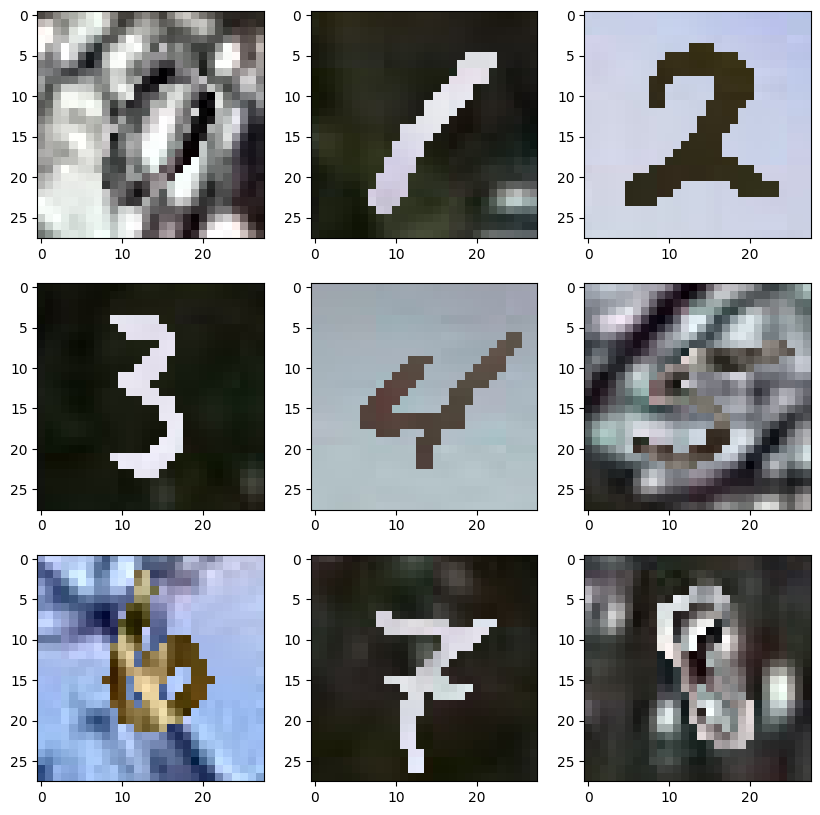

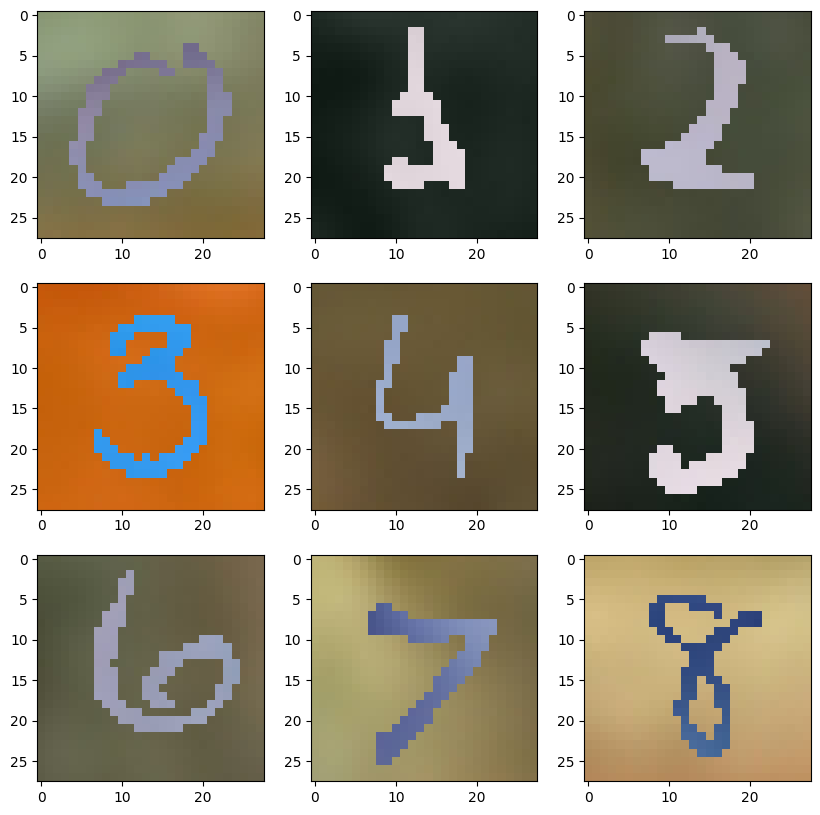

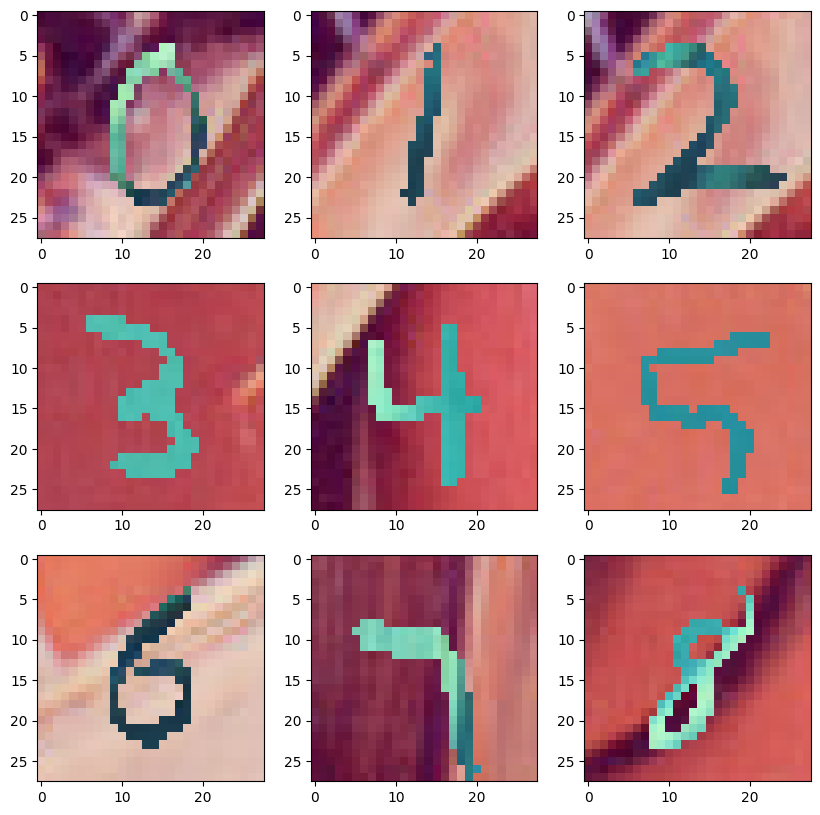

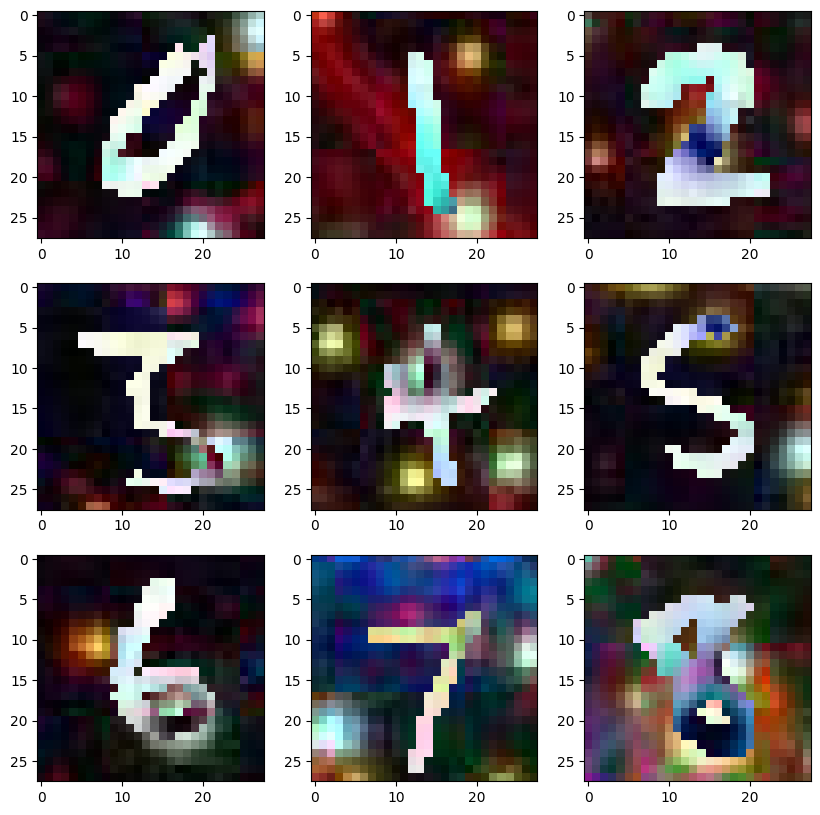

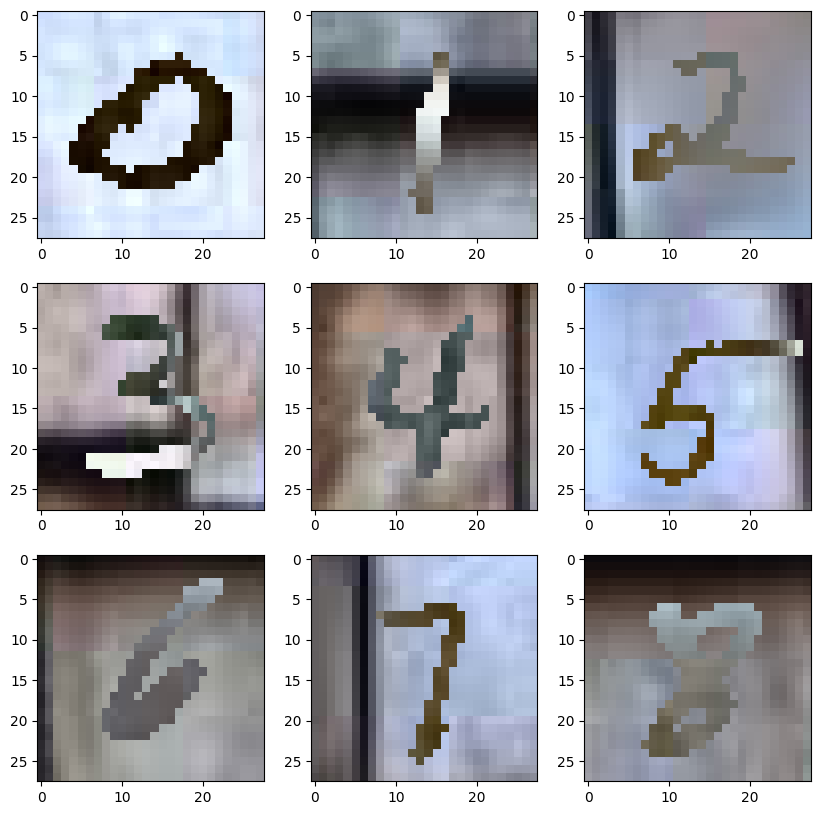

In [4]:
for n in range(5):
    folder_test_mo = f"./archive/PolyMNIST/MMNIST/test/m{str(n)}/"
    
    # Crear una nueva figura para cada valor de n
    plt.figure(figsize=(10, 10))
    
    # Mostrar 9 imágenes en una cuadrícula 3x3
    for i in range(9):
        plt.subplot(330+1+i)
        filename = folder_test_mo + str(i) + '.' + str(i) + '.png'
        image = imread(filename)
        plt.imshow(image)

    # Mostrar la figura
    plt.show()


# Entrenamiento

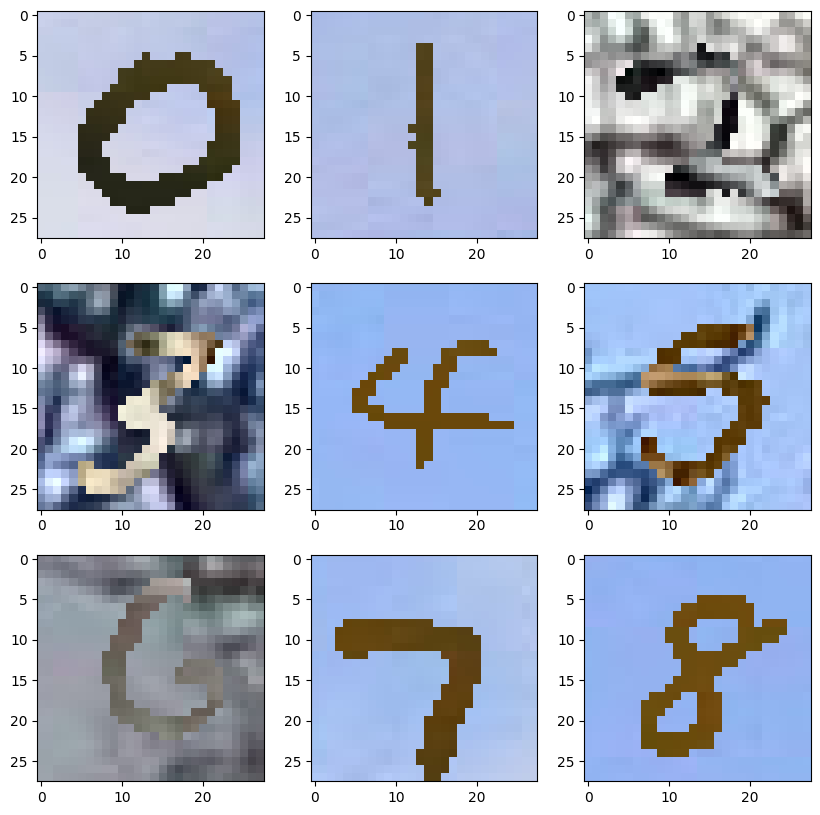

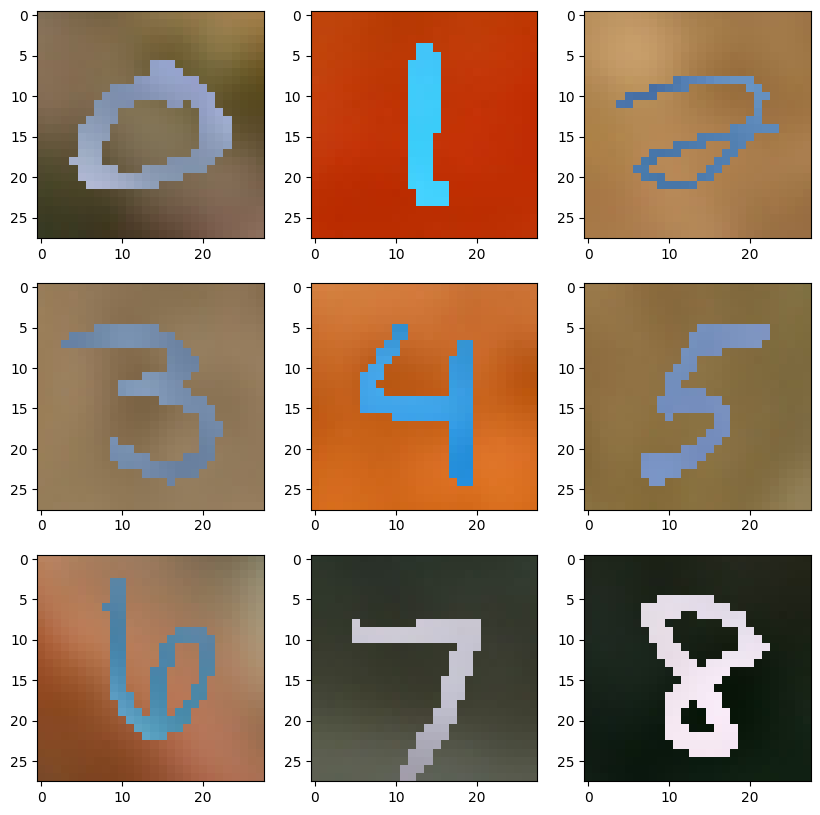

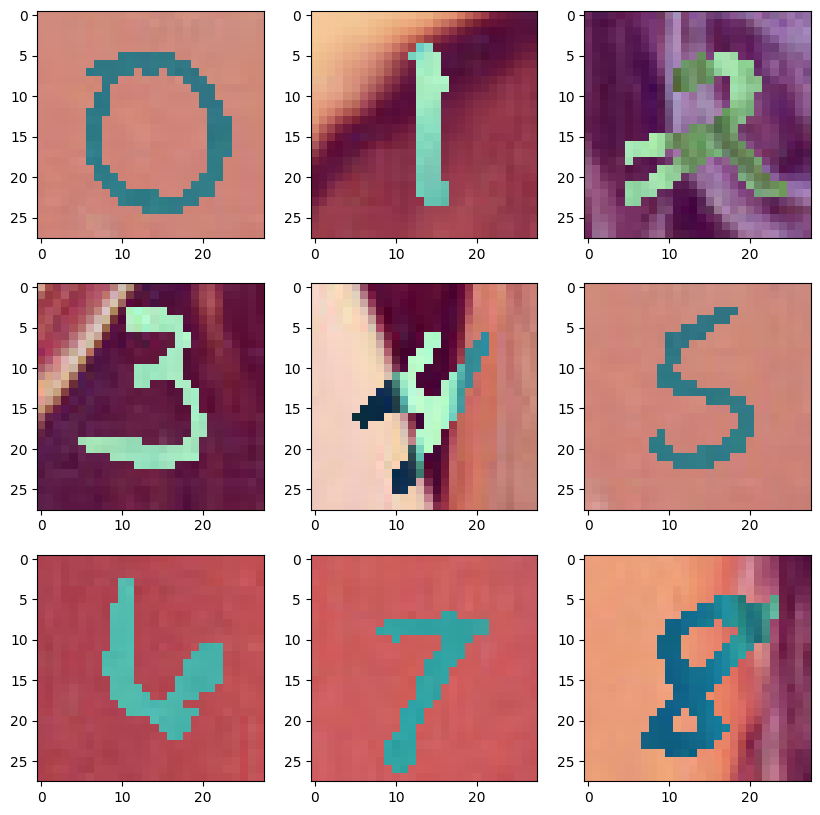

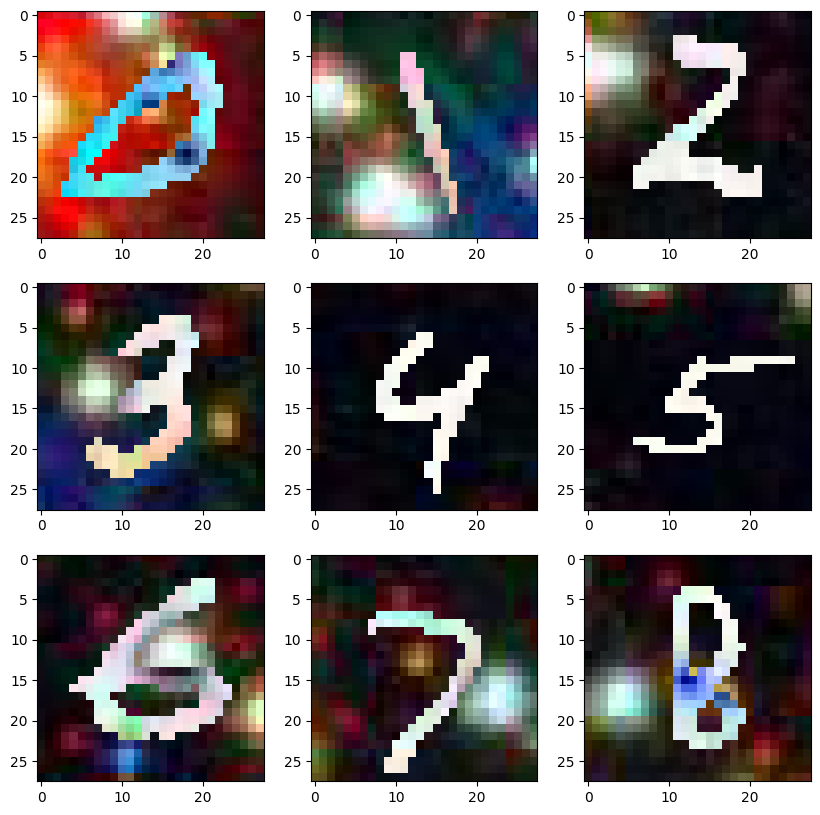

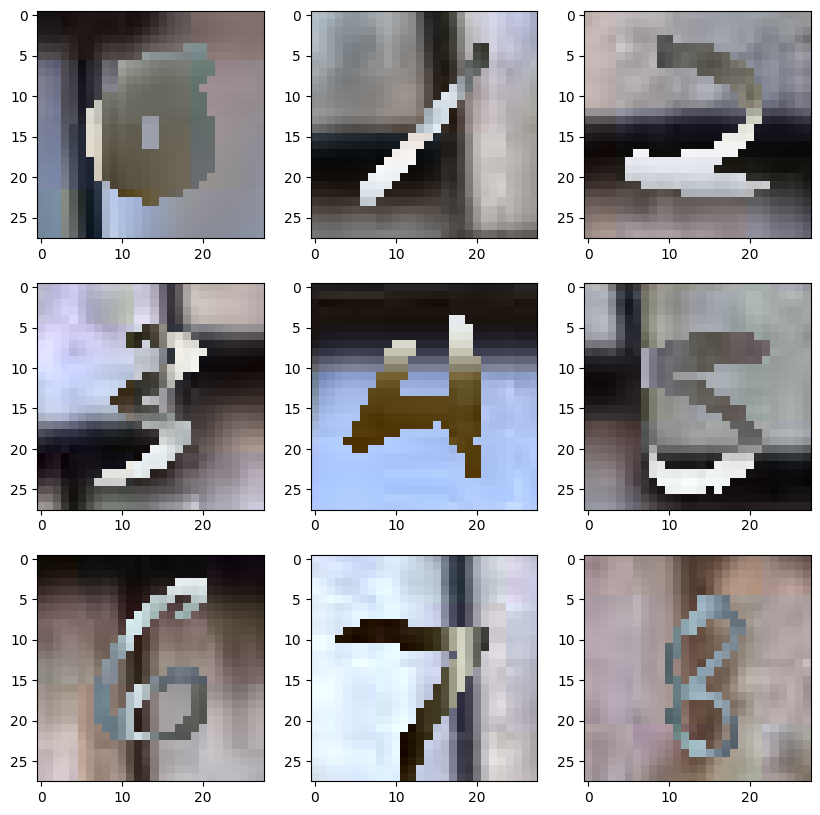

In [5]:
for n in range(5):
    folder_test_mo = f"./archive/PolyMNIST/MMNIST/train/m{str(n)}/"
    
    # Crear una nueva figura para cada valor de n
    plt.figure(figsize=(10, 10))
    
    # Mostrar 9 imágenes en una cuadrícula 3x3
    for i in range(9):
        plt.subplot(330+1+i)
        filename = folder_test_mo + str(i) + '.' + str(i) + '.png'
        image = imread(filename)
        plt.imshow(image)

    # Mostrar la figura
    plt.show()

En Ambos casos, tanto para prueba y entrenamiento, se aprecia que tienen la misma resolucion, pero con diferenncia
de como se representa el valor numerico en si.

In [12]:
# Estructura de carpetas
folder = "./archive/PolyMNIST/MMNIST"
subdirs = ['train/', 'test/']
labeldirs = ['m0/', 'm1/', 'm2/', 'm3/', 'm4/']

# 2.

In [7]:
classes = ["m0", "m1", "m2", "m3", "m4"]
images = []

for c in classes:
    path = f"./archive/PolyMNIST/MMNIST/train/" + c + "/"
    for img in listdir(path):
        images.append((c, img))

df = pd.DataFrame(images, columns=["class", "image"])

df.head()

,class,image
0,m0,1829.2.png
1,m0,1280.8.png
2,m0,4186.0.png
3,m0,543.3.png
4,m0,2610.7.png


In [8]:
df.describe()

,class,image
count,300000,300000
unique,5,60000
top,m0,1829.2.png
freq,60000,5


height      0.0
width       0.0
channels    0.0
dtype: float64

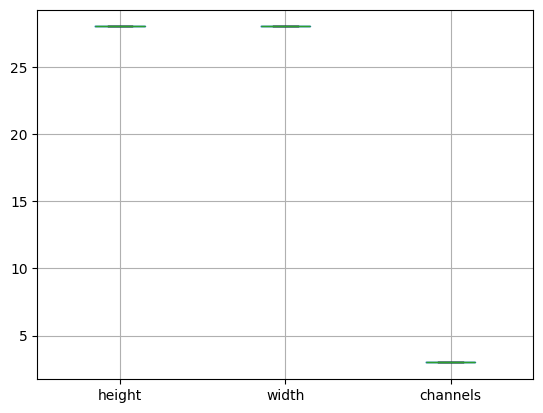

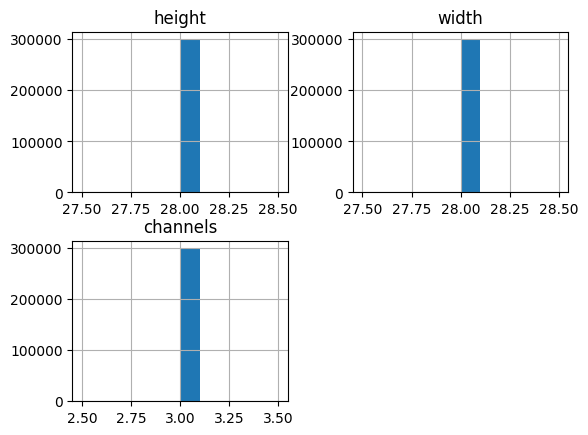

In [9]:
df["image"]    = df["class"] + "/" + df["image"]
df["shape"]    = df["image"].apply(lambda x: imread(f"./archive/PolyMNIST/MMNIST/train/" + x).shape)
df["height"]   = df["shape"].apply(lambda x: x[0])
df["width"]    = df["shape"].apply(lambda x: x[1])
df["channels"] = df["shape"].apply(lambda x: x[2])
df[["height", "width", "channels"]].boxplot()
df[["height", "width", "channels"]].median()
df[["height", "width", "channels"]].hist()
df[["height", "width", "channels"]].mean()
df[["height", "width", "channels"]].mode()
df[["height", "width", "channels"]].std()

  class          image        shape  height  width  channels
0    m0  m0/1829.2.png  (28, 28, 3)      28     28         3
1    m0  m0/1280.8.png  (28, 28, 3)      28     28         3
2    m0  m0/4186.0.png  (28, 28, 3)      28     28         3
3    m0   m0/543.3.png  (28, 28, 3)      28     28         3
4    m0  m0/2610.7.png  (28, 28, 3)      28     28         3
         height     width  channels
count  300000.0  300000.0  300000.0
mean       28.0      28.0       3.0
std         0.0       0.0       0.0
min        28.0      28.0       3.0
25%        28.0      28.0       3.0
50%        28.0      28.0       3.0
75%        28.0      28.0       3.0
max        28.0      28.0       3.0
class
m0    60000
m1    60000
m2    60000
m3    60000
m4    60000
Name: count, dtype: int64


Summarize dataset:   0%|                                  | 0/5 [00:00<?, ?it/s]/home/arg/.local/lib/python3.10/site-packages/ydata_profiling/model/typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
/home/arg/.local/lib/python3.10/site-packages/ydata_profiling/model/typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
/home/arg/.local/lib/python3.10/site-packages/ydata_profiling/model/typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
/home/arg/.local/lib/python3.10/site-packages/ydata_pr

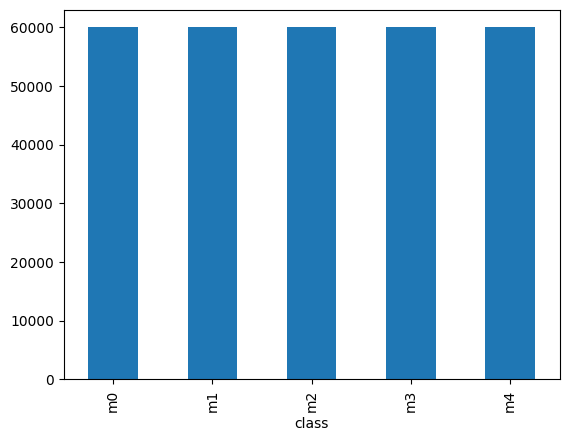

In [10]:
print(df.head())
print(df.describe())
print(df["class"].value_counts())
analysis = ProfileReport(df)
analysis.to_file('analysis.html')
df["class"].value_counts().plot(kind="bar")
df.to_csv("processed.csv")
plt.show()

In [11]:
df["class"].value_counts()

class
m0    60000
m1    60000
m2    60000
m3    60000
m4    60000
Name: count, dtype: int64

# 3.

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set directories
train_dir = './archive/PolyMNIST/MMNIST/train/'
test_dir = './archive/PolyMNIST/MMNIST/test/'

# Generadores de datos de imagen
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Carga de datos desde las subcarpetas m0, m1, m2, m3, m4 en train/
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Cambia esto según el tamaño de tus imágenes
    batch_size=32,
    class_mode='categorical'  # Asigna automáticamente etiquetas a las clases m0, m1, m2, m3, m4
)

# Carga de datos desde las subcarpetas m0, m1, m2, m3, m4 en test/
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Model 1: Simple CNN
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1
history_1 = model_1.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Model 2: Deep CNN with Data Augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
history_2 = model_2.fit(
    train_generator_augmented,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the models
loss_1, acc_1 = model_1.evaluate(test_generator)
loss_2, acc_2 = model_2.evaluate(test_generator)

print(f"Model 1 - Accuracy: {acc_1:.4f}, Loss: {loss_1:.4f}")
print(f"Model 2 - Accuracy: {acc_2:.4f}, Loss: {loss_2:.4f}")


Found 300000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.
Epoch 1/10


/home/arg/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-23 09:13:35.379386: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-23 09:13:35.380465: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setu

   1/9375 ━━━━━━━━━━━━━━━━━━━━ 2:29:32 957ms/step - accuracy: 0.2812 - loss: 1.6208

/home/arg/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 633s 67ms/step - accuracy: 0.9504 - loss: 0.1250 - val_accuracy: 0.9914 - val_loss: 0.0275
Epoch 2/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 683s 73ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9968 - val_loss: 0.0105
Epoch 3/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 611s 65ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9977 - val_loss: 0.0072
Epoch 4/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 693s 74ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9959 - val_loss: 0.0110
Epoch 5/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 632s 67ms/step - accuracy: 0.9978 - loss: 0.0075 - val_accuracy: 0.9985 - val_loss: 0.0057
Epoch 6/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 615s 66ms/step - accuracy: 0.9980 - loss: 0.0077 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 7/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 685s 73ms/step - accuracy: 0.9987 - loss: 0.0053 - val_accuracy: 0.9974 - val_loss: 0.0102
Epoch 8/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 685s 73ms/step - accuracy: 0.9988 - lo

# ¿Cuál fue el mejor módelo?
En este caso, el que mejor rendimiento obtuvo fue el modelo 1, con 0.9966. Se considera que hay sobre ajuste, pues es un valor
demasiado bueno para ser cierto

# Paso 4: Crear un Modelo de Redes Neuronales Simple

In [14]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam

# Directorios de las imágenes
train_dir = './archive/PolyMNIST/MMNIST/train/'
test_dir = './archive/PolyMNIST/MMNIST/test/'

# Generadores de datos de imagen
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),  # MNIST usa imágenes de 28x28 píxeles
    color_mode='grayscale',  # Cambiamos a escala de grises para simular MNIST
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

# Modelo de Red Neuronal Simple
model_snn = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Aplanamos la imagen 28x28 en un vector de 784 elementos
    Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    Dense(64, activation='relu'),  # Capa oculta con 64 neuronas
    Dense(5, activation='softmax')  # Capa de salida con 5 neuronas (una por cada clase)
])

# Compilamos el modelo
model_snn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_snn = model_snn.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluación del modelo
loss_snn, acc_snn = model_snn.evaluate(test_generator)
print(f"Red Neuronal Simple - Accuracy: {acc_snn:.4f}, Loss: {loss_snn:.4f}")


Found 300000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.
Epoch 1/10


/home/arg/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.6290 - loss: 0.8850 - val_accuracy: 0.7495 - val_loss: 0.6006
Epoch 2/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.7555 - loss: 0.5912 - val_accuracy: 0.7946 - val_loss: 0.5052
Epoch 3/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.7883 - loss: 0.5138 - val_accuracy: 0.8016 - val_loss: 0.4892
Epoch 4/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - accuracy: 0.8061 - loss: 0.4720 - val_accuracy: 0.8029 - val_loss: 0.4746
Epoch 5/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - accuracy: 0.8179 - loss: 0.4454 - val_accuracy: 0.8191 - val_loss: 0.4404
Epoch 6/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - accuracy: 0.8269 - loss: 0.4234 - val_accuracy: 0.8223 - val_loss: 0.4319
Epoch 7/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.8342 - loss: 0.4059 - val_accuracy: 0.8357 - val_loss: 0.4102
Epoch 8/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.8405 - loss: 0.3919 - val

# Paso 5: Crear un Modelo con un Algoritmo Tradicional

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

train_dir = './archive/PolyMNIST/MMNIST/train/'
test_dir = './archive/PolyMNIST/MMNIST/test/'

# Generadores de datos de imagen
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Crear arrays para almacenar todas las imágenes y etiquetas
x_train = []
y_train = []

for i in range(len(train_generator)):
    x_batch, y_batch = next(train_generator)
    x_train.append(x_batch)
    y_train.append(y_batch)

x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)
y_train = np.argmax(y_train, axis=1)  # Convertir etiquetas a clase única

x_test = []
y_test = []

for i in range(len(test_generator)):
    x_batch, y_batch = next(test_generator)
    x_test.append(x_batch)
    y_test.append(y_batch)

x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)
y_test = np.argmax(y_test, axis=1)  # Convertir etiquetas a clase única

# Aplanar las imágenes
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Estandarizar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Crear y entrenar el modelo de Logistic Regression
model_lr = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='auto')
model_lr.fit(x_train, y_train)

# Predicción y evaluación
y_pred = model_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}")
print(classification_report(y_test, y_pred))


2024-08-24 21:02:38.200423: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 21:02:38.352538: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 21:02:39.050121: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-24 21:02:40.615272: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 300000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.


/home/arg/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/arg/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.3942
              precision    recall  f1-score   support

           0       0.22      0.15      0.18     10000
           1       0.36      0.36      0.36     10000
           2       0.30      0.19      0.24     10000
           3       0.61      0.83      0.70     10000
           4       0.33      0.43      0.37     10000

    accuracy                           0.39     50000
   macro avg       0.36      0.39      0.37     50000
weighted avg       0.36      0.39      0.37     50000

